In [56]:
#Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st


In [39]:
#Reading all data files
age_df=pd.read_csv('Data/fertility_clean.csv')

dev_data=pd.read_csv('Data/gdp_clean.csv')


In [40]:
#Merging the two dataframes
merged_df=pd.merge(age_df,dev_data, on="Country")
age_clean_df=merged_df.copy()

In [41]:
#Displaying the dataframe
age_clean_df

,Country,ISO code,Period,Reference,Total fertility,Age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Mean age at childbearing,Year,Value,Development
0,Afghanistan,4.0,Around 1970,1973,8.21,168,359,355,307,235,137,81,30,2012,1958.447627,Developing
1,Afghanistan,4.0,..,1979,7.11,105,260,309,301,262,185,..,30.7,2012,1958.447627,Developing
2,Afghanistan,4.0,Around 2005,2003,7.52,146,333,350,289,217,143,..,30.1,2012,1958.447627,Developing
3,Afghanistan,4.0,Latest,2009,5.11,80,257,262,209,128,60,26,29.1,2012,1958.447627,Developing
4,Albania,8.0,Around 1970,1970,5.16,39,275,266,214,146,69,22,29.7,2012,10526.250106,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,Zimbabwe,716.0,Around 1970,1969,6.74,79,272,304,257,218,145,73,31.2,2012,2349.028207,Developing
793,Zimbabwe,716.0,Around 1985,1987,5.42,102,251,250,212,158,80,32,29.5,2012,2349.028207,Developing
794,Zimbabwe,716.0,Around 1995,1998,3.98,112,199,180,135,108,46,15,28.3,2012,2349.028207,Developing
795,Zimbabwe,716.0,Around 2005,2004,3.8,99,205,172,144,86,42,13,28.1,2012,2349.028207,Developing


DATA EXPLORATION
-The data above is obtained from the United Nations World Fertility Data 2012 which shows Age-specific fertility rates and Total fertility rate. This data was collected mainly by survery, census or registration. The data was partly cleaned by Aidan and the data above shows how it looks after merging.

-The age groups have been broken into 7 groups 7 age groups namely:  15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49. 

-The value of the Age-specific fertility rates (ASFRs) have been measured per 1,000 women in the age intervals. Each age group has an age interval of 5.

-The total fertility rate is calculated by adding all ASFRs for a particular country (row) and then multiplying by 0.005 (age interval/1000).

-Data cleaning part will delete all redundant columns and rows.

-Since we have more than one row of data for a particular country, only the row with the most recent year data will be kept.

DATA CLEANING
-This part involves removing all redundant rows and columns.

-Dropping all rows with NaN values

-Renaming columns suitably.

-Converting into proper data type for each column to perform aggregation.

-Keeping the most recent data if we have more than one complete row of data for a specific country.

-Calculating age specific fertility rate as we have only value per 1000 in 5 year interval.

In [42]:
#Deleting all redundant columns
age_clean_df = age_clean_df.drop(columns=["ISO code", "Period","Mean age at childbearing ","Value", "Year"])

# Renaming columns appropriately
age_clean_df=age_clean_df.rename(columns={"Age: 15-19": "Fertility at age: 15-19", "Total fertility": "Total fertility rate"})
age_clean_df.head()

,Country,Reference,Total fertility rate,Fertility at age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Development
0,Afghanistan,1973,8.21,168,359,355,307,235,137,81,Developing
1,Afghanistan,1979,7.11,105,260,309,301,262,185,..,Developing
2,Afghanistan,2003,7.52,146,333,350,289,217,143,..,Developing
3,Afghanistan,2009,5.11,80,257,262,209,128,60,26,Developing
4,Albania,1970,5.16,39,275,266,214,146,69,22,Developing


In [43]:
#Cleaning the data for fertility columns for different age groups. Deleting rows containing .. as their values
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 15-19"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 20-24"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 25-29"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 30-34"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 35-39"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 40-44"]!="..",:]
age_clean_df=age_clean_df.loc[age_clean_df["Fertility at age: 45-49"]!="..",:]

In [44]:
#Deleting any rows with NaN values using dropna
age_clean_df=age_clean_df.dropna(how="any")

In [45]:
#Converting the coloumns values for fertility into float
age_clean_df=age_clean_df.astype({"Reference ": int, "Total fertility rate":float, "Fertility at age: 15-19":float,"Fertility at age: 20-24":float, "Fertility at age: 25-29":float, "Fertility at age: 30-34":float,
                                  "Fertility at age: 35-39":float, "Fertility at age: 40-44":float, "Fertility at age: 45-49":float})

In [46]:
#Removing rows with outdated data for unique countries by first sorting the country and year in descending order and then dropping duplicates for country, keeping first row.

age_clean_df = age_clean_df.sort_values(by=["Country", "Reference "], ascending=[True, False])
age_clean_df = age_clean_df.drop_duplicates(subset="Country", keep="first")
 

In [47]:
#Deleting Reference column to have just fertility data
age_clean_df = age_clean_df.drop(columns=["Reference "])

In [48]:
#Calculating fertility rates for each country since Age Specific Fertility Rates are measured per 1000 women in 5 year age intervals
age_clean_df["Fertility rate at age: 15-19"]=age_clean_df["Fertility at age: 15-19"]*5/1000
age_clean_df["Fertility rate at age: 20-24"]=age_clean_df["Fertility at age: 20-24"]*5/1000
age_clean_df["Fertility rate at age: 25-29"]=age_clean_df["Fertility at age: 25-29"]*5/1000
age_clean_df["Fertility rate at age: 30-34"]=age_clean_df["Fertility at age: 30-34"]*5/1000
age_clean_df["Fertility rate at age: 35-39"]=age_clean_df["Fertility at age: 35-39"]*5/1000
age_clean_df["Fertility rate at age: 40-44"]=age_clean_df["Fertility at age: 40-44"]*5/1000
age_clean_df["Fertility rate at age: 45-49"]=age_clean_df["Fertility at age: 45-49"]*5/1000
age_clean_df.head()

,Country,Total fertility rate,Fertility at age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Development,Fertility rate at age: 15-19,Fertility rate at age: 20-24,Fertility rate at age: 25-29,Fertility rate at age: 30-34,Fertility rate at age: 35-39,Fertility rate at age: 40-44,Fertility rate at age: 45-49
3,Afghanistan,5.11,80.0,257.0,262.0,209.0,128.0,60.0,26.0,Developing,0.400,1.285,1.310,1.045,0.640,0.300,0.130
8,Albania,1.33,11.0,70.0,92.0,61.0,25.0,5.0,1.0,Developing,0.055,0.350,0.460,0.305,0.125,0.025,0.005
13,Algeria,2.74,9.0,75.0,139.0,149.0,118.0,51.0,8.0,Developed,0.045,0.375,0.695,0.745,0.590,0.255,0.040
18,Angola,5.80,166.0,244.0,272.0,231.0,164.0,68.0,16.0,Developing,0.830,1.220,1.360,1.155,0.820,0.340,0.080
23,Antigua and Barbuda,2.01,67.0,94.0,88.0,79.0,56.0,19.0,1.0,Developed,0.335,0.470,0.440,0.395,0.280,0.095,0.005


ANALYSIS
-At this point, the data has already been cleaned and we can proceed with analysis

In [49]:
#Overview of number of developing and developed countries in my analysis
country_count=len(age_clean_df["Country"])

developed_country = age_clean_df.loc[age_clean_df["Development"]=="Developed", "Country"]
developed_country_count=len(developed_country)

developing_country = age_clean_df.loc[age_clean_df["Development"]=="Developing", "Country"]
developing_country_count=len(developing_country)

print(f"This analysis is done on {country_count} countries out of which {developed_country_count} are developed countries and {developing_country_count} are developing countries")

This analysis is done on 166 countries out of which 78 are developed countries and 88 are developing countries


CREATING A BOX PLOT TO DETERMINE IF WE HAVE OUTLIERS IN THE DATA. THE BOX PLOT WILL ALSO SHOW THE DISTRIBUTION OF THE FERTILITY RATE FOR DIFFERENT AGE GROUPS

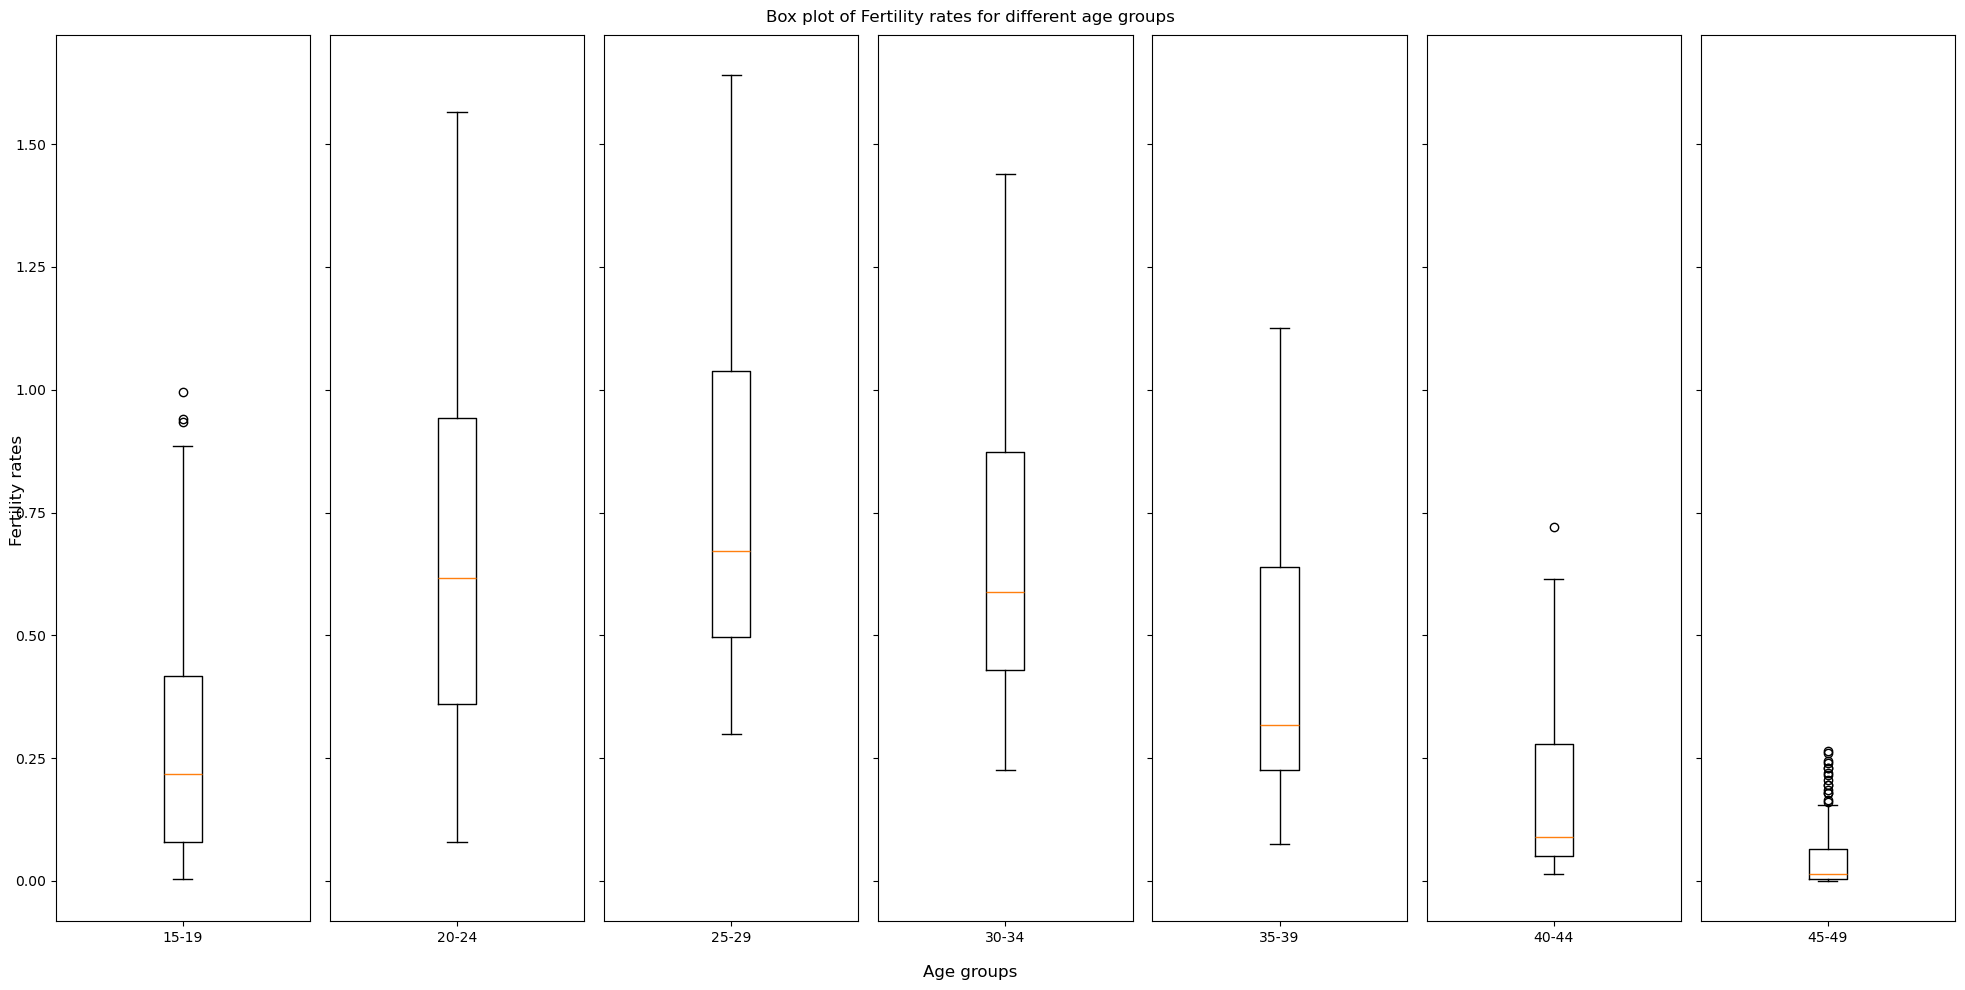

In [51]:
#Creating box plot of fertility rates for different age groups

age_groups = ["Fertility rate at age: 15-19", "Fertility rate at age: 20-24","Fertility rate at age: 25-29", "Fertility rate at age: 30-34",
    "Fertility rate at age: 35-39", "Fertility rate at age: 40-44","Fertility rate at age: 45-49"]

age_groups_label=['15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49']

fig, axs = plt.subplots(1, len(age_groups), figsize=(20, 10), sharey=True)

for i in range(len(age_groups)):
    box_data = age_clean_df[age_groups[i]]
    axs[i].boxplot(box_data)
    axs[i].set_xticklabels([age_groups_label[i]], rotation=0)

fig.suptitle("Box plot of Fertility rates for different age groups")
fig.supxlabel("Age groups")
fig.supylabel("Fertility rates")


plt.tight_layout()
plt.show()

INVESTIGATING THE RELATIONSHIP BETWEEN AGE GROUPS AND FERTILITY RATES

------HYPOTHESIS TESTING-------

Null Hypothesis: There is no correlation between mean age range and mean fertility rate

Alternate Hypothesis: There is a correlation between mean age range and mean fertility rate

Significance level: 0.05

Test used: Pearson's correlation

Visualisation: CREATING A SCATTER PLOT TO DETERMINE THE CORRELATION BETWEEN THE MEAN FERTILITY RATE AND THE AGE GROUP FOR DEVELOPED AND DEVELOPING COUNTRIES

-This is will carried out by calculating middle value of each age range.
-For each age group, the average fertility rate will be computed for developing and developed countries

In [61]:
#Separating developed and developing countries data into separate dataframes
developed_fertility_rate=age_clean_df[age_clean_df["Development"]=="Developed"]
developing_fertility_rate=age_clean_df[age_clean_df["Development"]=="Developing"]

#Finding y values for scatter plot by calculating mean of fertility rate for each age group for developing and developed countries

age_groups = ["Fertility rate at age: 15-19", "Fertility rate at age: 20-24","Fertility rate at age: 25-29", "Fertility rate at age: 30-34",
    "Fertility rate at age: 35-39", "Fertility rate at age: 40-44","Fertility rate at age: 45-49"]

age_groups_label=['15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49']

mean_fertility_rate_developed=[]
mean_fertility_rate_developing=[]

for i in range(len(age_groups)):
    mean_val_developed=developed_fertility_rate[age_groups[i]].mean()
    mean_val_developing=developing_fertility_rate[age_groups[i]].mean()
    mean_fertility_rate_developed.append(mean_val_developed)
    mean_fertility_rate_developing.append(mean_val_developing)

#Finding x values for scatter plot by calculating mean of each age range

x_values_scatter=[(15+19)/2,  (20+24)/2, (25+29)/2, (30+34)/2, (35+39)/2, (40+44)/2, (45+49)/2]
x_values_scatter = np.array(x_values_scatter)



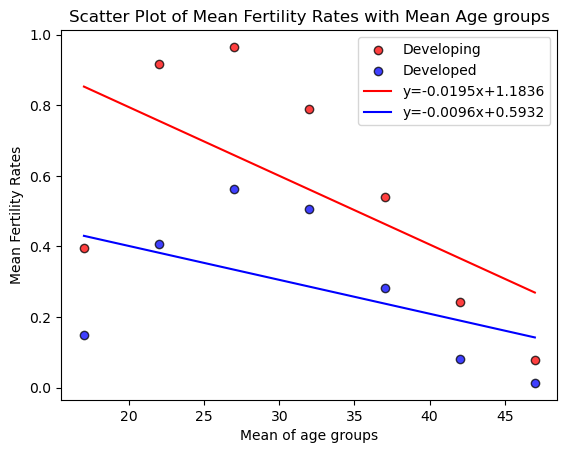

In [62]:
#Creating scatter plot and line of regression

plt.scatter(x_values_scatter, mean_fertility_rate_developing, marker='o', label="Developing", alpha=0.75, facecolor="red", edgecolor="black")
plt.scatter(x_values_scatter, mean_fertility_rate_developed, marker='o', label="Developed", alpha=0.75, facecolor="blue", edgecolor="black")

# Perform linear regression
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values_scatter, mean_fertility_rate_developing)
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values_scatter, mean_fertility_rate_developed)

# Calculate regression values
regress_values_developing = (x_values_scatter * slope1) + intercept1
regress_values_developed = (x_values_scatter * slope2) + intercept2

# Prepare the equation strings for the regression lines
line_eq1 = "y=" + str(round(slope1, 4)) + "x+" + str(round(intercept1, 4))
line_eq2 = "y=" + str(round(slope2, 4)) + "x+" + str(round(intercept2, 4))

# Plot regression lines
plt.plot(x_values_scatter, regress_values_developing, "r-", label=line_eq1)  # Red line for developing
plt.plot(x_values_scatter, regress_values_developed, "b-", label=line_eq2)     # Blue line for developed

# Adding labels and legend
plt.xlabel('Mean of age groups')
plt.ylabel('Mean Fertility Rates')
plt.legend()
plt.title('Scatter Plot of Mean Fertility Rates with Mean Age groups')
plt.show()


In [63]:
#Using Pearson correlation coefficient
(r_developing,p_developing)=st.pearsonr(x_values_scatter,mean_fertility_rate_developing)
(r_developed,p_developed)=st.pearsonr(x_values_scatter,mean_fertility_rate_developed)

print(f"r_developing:  {r_developing}")
print(f"r_developed:  {r_developed}")
print(f"p_developing:  {p_developing}")
print(f"p_developed:  {p_developed}")



print(f"The r^2-value for developing countries is {(r_developing*r_developing)}")
print(f"The r^2-value for developed countries is {(r_developed*r_developed)}")

r_developing:  -0.6129163954302652
r_developed:  -0.4852358839393617
p_developing:  0.1433548891190728
p_developed:  0.26968852267741816
The r^2-value for developing countries is 0.3756665077872292
The r^2-value for developed countries is 0.23545386306241367


SUMMARY OF ANALYSIS FROM HYPOTHESIS TESTING:

For developing countries:

The r value is -0.613, it indicates a negative correlation between the age groups and fertility rates. 
p value is 0.143 which is greater than 0.05. Hence, fail to reject null hypothesis.

The pearson correlation coefficient clearly shows that there is a weak negative correlation between mean age 

PLOTTING A STACKED BARCHART(OVERLAYED) TO SHOW THE FERTILITY RATE FOR DIFFERENT AGE GROUPS FOR DEVELOPING AND DEVELOPED COUNTRIES

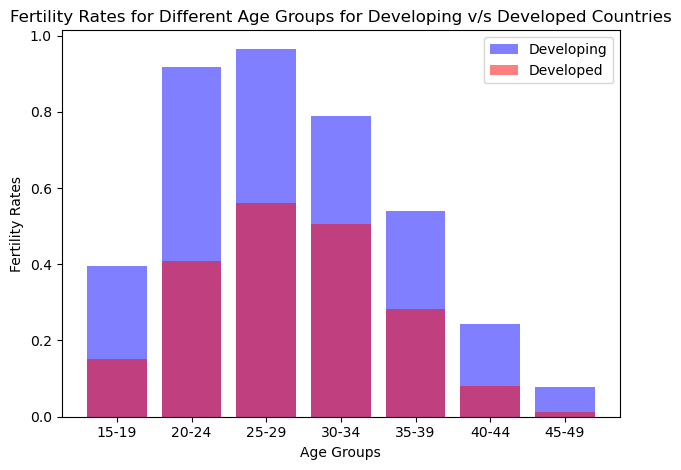

In [52]:


#Calculating the mean of the age group
developed_fertility_rate_mean = developed_fertility_rate[age_groups].mean()
developing_fertility_rate_mean = developing_fertility_rate[age_groups].mean()


plt.bar(age_groups, developing_fertility_rate_mean, label='Developing', color='blue', alpha=0.5, align='center')
plt.bar(age_groups, developed_fertility_rate_mean, label='Developed', color='red', alpha=0.5, align='center')

plt.xlabel('Age Groups')
plt.ylabel('Fertility Rates')
plt.title('Fertility Rates for Different Age Groups for Developing v/s Developed Countries')
age_group_label=['15-19', '20-24','25-29', '30-34','35-39', '40-44','45-49']
plt.xticks(age_groups,age_group_label , rotation=0)
plt.legend()

plt.tight_layout()
plt.show()

SUMMARY OF ANALYSIS OF THE BARCHART

The barchart graph above is a stacked barchart(overlayed) and this clearly demonstrates that the average value of fertility rates is higher for developing countries as compared to developed countries for all the age groups. The height of the bars for developing countries is almost twice that of developed countries. This behaviour can be explained due to many reasons:
-Lack of resources and hence limited access to contraceptive methods in developing countries, resulting in higher fertility rates
-Better education services in developed countries resulting in women prioritizing their careers over family planning
-Cultural beliefs in developing countries assigns 

This also shows that age range 25-29 has the highest fertility rate among all age groups for both developed and developing countries.